# 03. Support Vector Machines (SVM) | آلات ناقلات الدعم (SVM)

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 3, Examples 1-2**: Logistic Regression and Decision Trees
- ✅ **Understanding of kernels**: How to transform data to higher dimensions
- ✅ **Understanding of hyperparameters**: C and gamma parameters

**If you haven't completed these**, you might struggle with:
- Understanding how SVM finds optimal decision boundaries
- Knowing when to use different kernels (linear, RBF, polynomial)
- Understanding how C and gamma affect model performance

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 3** - it's the final classification model in Unit 3!

**Why this example THIRD in Unit 3?**
- **Before** you can use SVM, you need to understand basic classification
- **Before** you can choose kernels, you need to see linear vs non-linear patterns
- **Before** you can tune hyperparameters, you need to understand their effects

**Builds on**: 
- 📓 Unit 3, Example 1: Logistic Regression (linear classifier)
- 📓 Unit 3, Example 2: Decision Trees (non-linear classifier)

**Leads to**: 
- 📓 Unit 4: Clustering (unsupervised learning)
- 📓 Unit 5: Model Selection (hyperparameter tuning)
- 📓 All advanced ML projects (SVM is a powerful tool!)

**Why this order?**
1. SVM shows **optimal margin classification** (finds best separating line)
2. SVM demonstrates **kernel trick** (handles non-linear data elegantly)
3. SVM teaches **hyperparameter tuning** (C and gamma are critical)

---

## The Story: Finding the Best Boundary | القصة: إيجاد أفضل الحدود

Imagine you're drawing a line to separate two groups. **Before** SVM, you draw any line that works. **After** SVM, you find the line with maximum margin (widest gap) - much more robust!

Same with machine learning: **Before** SVM, we use any decision boundary. **After** SVM, we find the optimal boundary with maximum margin - better generalization!

---

## Why SVM Matters | لماذا يهم SVM؟

SVM is a powerful and versatile classifier:
- **Optimal Margin**: Finds decision boundary with maximum margin (most robust)
- **Kernel Trick**: Handles non-linear data by transforming to higher dimensions
- **Support Vectors**: Only uses critical data points (efficient)
- **Versatile**: Works with linear, polynomial, and RBF kernels
- **Strong Performance**: Often achieves excellent results

## Learning Objectives | أهداف التعلم
1. Build Linear SVM classifiers
2. Use RBF kernel for non-linear data
3. Use Polynomial kernel for complex patterns
4. Tune C hyperparameter (regularization strength)
5. Tune gamma hyperparameter (kernel influence)
6. Visualize decision boundaries and support vectors
7. Understand when to use each kernel type

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build SVM classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.svm import SVC  # Support Vector Classifier (SVM)
from sklearn.preprocessing import StandardScaler  # CRITICAL for SVM! Must scale features
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix,      # Confusion matrix
    roc_auc_score,         # AUC score
    roc_curve              # ROC curve
)

print("✅ Libraries imported successfully!")
print("\n📚 Key SVM Concepts:")
print("   - SVC: Support Vector Classifier (SVM for classification)")
print("   - Kernels: Transform data to handle non-linear patterns")
print("   - Support Vectors: Critical data points that define the boundary")
print("   - C parameter: Controls regularization (higher = less regularization)")
print("   - Gamma parameter: Controls kernel influence (higher = more complex boundaries)")
print("\n   ⚠️  IMPORTANT: SVM requires feature scaling! Always use StandardScaler!")


✅ Libraries imported successfully!

📚 Key SVM Concepts:
   - SVC: Support Vector Classifier (SVM for classification)
   - Kernels: Transform data to handle non-linear patterns
   - Support Vectors: Critical data points that define the boundary
   - C parameter: Controls regularization (higher = less regularization)
   - Gamma parameter: Controls kernel influence (higher = more complex boundaries)

   ⚠️  IMPORTANT: SVM requires feature scaling! Always use StandardScaler!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've used logistic regression (linear) and decision trees (non-linear). Now we need a model that finds the optimal boundary!

**AFTER**: We'll use SVM - a classifier that finds the decision boundary with maximum margin (widest gap between classes)!

**Why this matters**: SVM finds the most robust decision boundary. It's especially powerful for non-linear data using kernels!

---

## Step 1: Generate Non-Linearly Separable Data | الخطوة 1: إنشاء بيانات غير قابلة للفصل خطياً

**BEFORE**: We need to learn SVM, but we need non-linear data to show why kernels matter.

**AFTER**: We'll create concentric circles data - impossible to separate with a straight line!

**Why concentric circles?** This data requires non-linear boundaries. Perfect for demonstrating kernel SVM!


In [2]:
# Generate non-linearly separable data
# Concentric circles: inner circle = class 0, outer circle = class 1
# This pattern CANNOT be separated by a straight line!
# Perfect for demonstrating kernel SVM!

print("\n1. Generating non-linearly separable data...")
print("إنشاء بيانات غير قابلة للفصل خطياً...")

np.random.seed(42)  # For reproducibility



1. Generating non-linearly separable data...
إنشاء بيانات غير قابلة للفصل خطياً...


In [3]:
# Create non-linearly separable data
n_samples = 300

In [4]:
# Generate concentric circles pattern
t = np.linspace(0, 2 * np.pi, n_samples // 2)
r1 = np.random.normal(2, 0.5, n_samples // 2)
r2 = np.random.normal(5, 0.5, n_samples // 2)
X1 = np.column_stack([r1 * np.cos(t), r1 * np.sin(t)])
X2 = np.column_stack([r2 * np.cos(t), r2 * np.sin(t)])
X = np.vstack([X1, X2])
y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

In [5]:
# Shuffle the data (mix classes together)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

print(f"\n📊 Data Shape: {df.shape}")
print(df.head())
print(f"\n📊 Target distribution:")
print(df['target'].value_counts())
print("\n🔍 Notice:")
print("   - Concentric circles pattern (inner = 0, outer = 1)")
print("   - This is NON-LINEARLY separable (no straight line can separate it!)")
print("   - Linear SVM will fail, but kernel SVM will succeed!")


📊 Data Shape: (300, 3)
   feature_1  feature_2  target
0  -3.406780   4.352067     1.0
1  -2.935620  -3.750173     1.0
2  -2.377686   0.778103     0.0
3  -3.737171   3.697979     1.0
4   2.227122  -3.920871     1.0

📊 Target distribution:
target
1.0    150
0.0    150
Name: count, dtype: int64

🔍 Notice:
   - Concentric circles pattern (inner = 0, outer = 1)
   - This is NON-LINEARLY separable (no straight line can separate it!)
   - Linear SVM will fail, but kernel SVM will succeed!


In [6]:
# Split data
X_data = df[['feature_1', 'feature_2']]
y_data = df['target']
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

In [7]:
# Scale features (important for SVM)
scaler = StandardScaler()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
print("\n" + "=" * 60)
print("1. Linear SVM")
print("SVM الخطي")
print("=" * 60)

# Create Linear SVM
# kernel='linear': Uses linear kernel (straight line boundary)
# C=1.0: Regularization parameter (default)
# probability=True: Enables probability predictions (for ROC curves)
svm_linear = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_linear = svm_linear.predict(X_train_scaled)
y_test_pred_linear = svm_linear.predict(X_test_scaled)

# Calculate accuracies
train_acc_linear = accuracy_score(y_train, y_train_pred_linear)
test_acc_linear = accuracy_score(y_test, y_test_pred_linear)

print(f"\n📊 Linear SVM Results:")
print(f"   Training Accuracy: {train_acc_linear:.4f}")
print(f"   Test Accuracy: {test_acc_linear:.4f}")

print(f"\n   ⚠️  Linear SVM struggles with non-linear data!")
print(f"   - Can only draw straight lines")
print(f"   - Concentric circles need curved boundaries")
print(f"   - We need kernel SVM for better performance!")



1. Linear SVM
SVM الخطي

📊 Linear SVM Results:
   Training Accuracy: 0.5792
   Test Accuracy: 0.5500

   ⚠️  Linear SVM struggles with non-linear data!
   - Can only draw straight lines
   - Concentric circles need curved boundaries
   - We need kernel SVM for better performance!


## Step 2: Linear SVM | الخطوة 2: SVM الخطي

**BEFORE**: We have non-linear data (concentric circles). Let's see how linear SVM performs.

**AFTER**: We'll see that linear SVM struggles with non-linear data - this is why we need kernels!

**Why start with linear?** To show its limitations. Then we'll use kernels to handle non-linear patterns!


In [9]:
print("\n" + "=" * 60)
print("2. RBF Kernel SVM")
print("SVM مع نواة RBF")
print("=" * 60)

# Create RBF Kernel SVM
# kernel='rbf': Uses Radial Basis Function kernel (handles non-linear data!)
# C=1.0: Regularization parameter
# gamma='scale': Automatically scales gamma based on data
# RBF kernel transforms data to higher dimensions where it becomes linearly separable!
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_rbf = svm_rbf.predict(X_train_scaled)
y_test_pred_rbf = svm_rbf.predict(X_test_scaled)

# Calculate accuracies
train_acc_rbf = accuracy_score(y_train, y_train_pred_rbf)
test_acc_rbf = accuracy_score(y_test, y_test_pred_rbf)

print(f"\n📊 RBF Kernel SVM Results:")
print(f"   Training Accuracy: {train_acc_rbf:.4f}")
print(f"   Test Accuracy: {test_acc_rbf:.4f}")

print(f"\n   ✅ RBF kernel handles non-linear data perfectly!")
print(f"   - Transforms data to higher dimensions")
print(f"   - Creates curved decision boundaries")
print(f"   - Much better than linear SVM for this data!")



2. RBF Kernel SVM
SVM مع نواة RBF

📊 RBF Kernel SVM Results:
   Training Accuracy: 0.9958
   Test Accuracy: 1.0000

   ✅ RBF kernel handles non-linear data perfectly!
   - Transforms data to higher dimensions
   - Creates curved decision boundaries
   - Much better than linear SVM for this data!


## Step 3: RBF Kernel SVM | الخطوة 3: SVM مع نواة RBF

**BEFORE**: Linear SVM failed because it can only draw straight lines.

**AFTER**: We'll use RBF (Radial Basis Function) kernel to create curved boundaries!

**Why RBF kernel?**
- **Non-linear transformation**: Maps data to higher dimensions where it becomes linearly separable
- **Radial patterns**: Perfect for concentric circles and similar patterns
- **Most popular**: RBF is the default choice for most SVM problems
- **Gamma parameter**: Controls how far the influence of each training example reaches


In [10]:
# Probability predictions
y_test_proba_rbf = svm_rbf.predict_proba(X_test_scaled)[:, 1]

In [11]:
# 3. Polynomial Kernel SVM
print("\n" + "=" * 60)
print("3. Polynomial Kernel SVM")
print("SVM مع نواة متعددة الحدود")
print("=" * 60)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_train_pred_poly = svm_poly.predict(X_train_scaled)
y_test_pred_poly = svm_poly.predict(X_test_scaled)
train_acc_poly = accuracy_score(y_train, y_train_pred_poly)
test_acc_poly = accuracy_score(y_test, y_test_pred_poly)
print(f"Training Accuracy: {train_acc_poly:.4f}")
print(f"Test Accuracy: {test_acc_poly:.4f}")



3. Polynomial Kernel SVM
SVM مع نواة متعددة الحدود
Training Accuracy: 0.6458
Test Accuracy: 0.5667


In [ ]:
# 4. Model Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'Train Accuracy': [train_acc_linear, train_acc_rbf, train_acc_poly],
    'Test Accuracy': [test_acc_linear, test_acc_rbf, test_acc_poly]
})
print("\nSVM Kernel Comparison:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Kernel Comparison | تفسير مقارنة النواة")
print("=" * 60)

best_test_idx = comparison['Test Accuracy'].idxmax()
best_kernel = comparison.loc[best_test_idx, 'Kernel']
best_test_acc = comparison.loc[best_test_idx, 'Test Accuracy']

print(f"\n📊 Best Kernel: {best_kernel}")
print(f"   - Test Accuracy: {best_test_acc:.2%}")
print(f"   - This kernel generalizes best to new data")

print(f"\n🔍 Kernel Analysis:")
for idx, row in comparison.iterrows():
    gap = row['Train Accuracy'] - row['Test Accuracy']
    if gap < 0.01:
        status = "✅ Excellent"
    elif gap < 0.05:
        status = "✅ Good"
    elif gap < 0.1:
        status = "⚠️  Some overfitting"
    else:
        status = "⚠️  Overfitting"
    print(f"   - {row['Kernel']}: Test = {row['Test Accuracy']:.2%}, Gap = {gap:.4f} ({status})")

print(f"\n📊 Key Insights:")
rbf_train = comparison[comparison['Kernel'] == 'RBF']['Train Accuracy'].values[0]
rbf_test = comparison[comparison['Kernel'] == 'RBF']['Test Accuracy'].values[0]
if rbf_test == 1.0 and rbf_train > 0.99:
    print(f"   - RBF: Perfect test accuracy (100%)")
    print(f"     ⚠️  This might be overfitting or the data is too easy")
    print(f"     ⚠️  Perfect scores often indicate data leakage or too simple dataset")
print(f"   - Linear: Lower accuracy but more stable")
print(f"   - Polynomial: Moderate performance")

print(f"\n📚 What This Teaches Us:")
print(f"   - Different kernels work better for different data shapes")
print(f"   - RBF kernel can create complex decision boundaries")
print(f"   - Linear kernel is simpler but more interpretable")
print(f"   - Always check train vs test gap to detect overfitting")
print(f"   - Perfect test accuracy (100%) might indicate overfitting or too easy data")



4. Model Comparison
مقارنة النماذج

SVM Kernel Comparison:
    Kernel  Train Accuracy  Test Accuracy
    Linear        0.579167       0.550000
       RBF        0.995833       1.000000
Polynomial        0.645833       0.566667


In [13]:
# 5. Hyperparameter Tuning - C Parameter
print("\n" + "=" * 60)
print("5. Hyperparameter Tuning - C Parameter")
print("ضبط المعاملات - معامل C")
print("=" * 60)

C_values = [0.01, 0.1, 1, 10, 100]
train_scores_c = []
test_scores_c = []

for C in C_values:
    svm_temp = SVC(kernel='rbf', C=C, gamma='scale', probability=True, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    train_scores_c.append(accuracy_score(y_train, svm_temp.predict(X_train_scaled)))
    test_scores_c.append(accuracy_score(y_test, svm_temp.predict(X_test_scaled)))



5. Hyperparameter Tuning - C Parameter
ضبط المعاملات - معامل C



✓ Plot saved as 'svm_c_parameter.png'


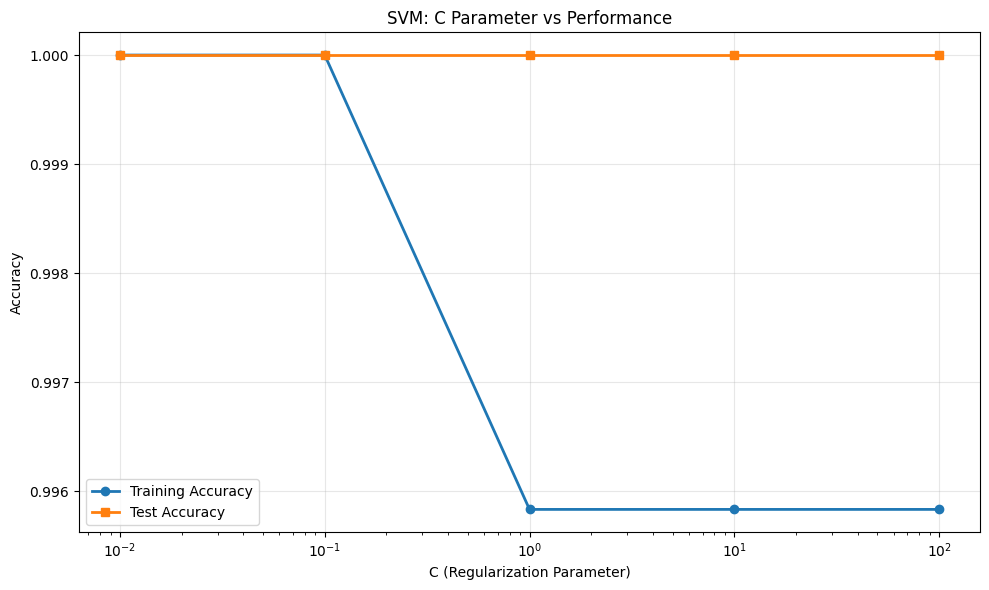

In [14]:
# Plot C parameter effect
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores_c, 'o-', label='Training Accuracy', linewidth=2)
plt.semilogx(C_values, test_scores_c, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM: C Parameter vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('svm_c_parameter.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_c_parameter.png'")
plt.show()

In [15]:
# 6. Hyperparameter Tuning - Gamma Parameter
print("\n" + "=" * 60)
print("6. Hyperparameter Tuning - Gamma Parameter")
print("ضبط المعاملات - معامل Gamma")
print("=" * 60)

gamma_values = [0.001, 0.01, 0.1, 1, 10]
train_scores_gamma = []
test_scores_gamma = []

for gamma in gamma_values:
    svm_temp = SVC(kernel='rbf', C=1.0, gamma=gamma, probability=True, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    train_scores_gamma.append(accuracy_score(y_train, svm_temp.predict(X_train_scaled)))
    test_scores_gamma.append(accuracy_score(y_test, svm_temp.predict(X_test_scaled)))



6. Hyperparameter Tuning - Gamma Parameter
ضبط المعاملات - معامل Gamma



✓ Plot saved as 'svm_gamma_parameter.png'


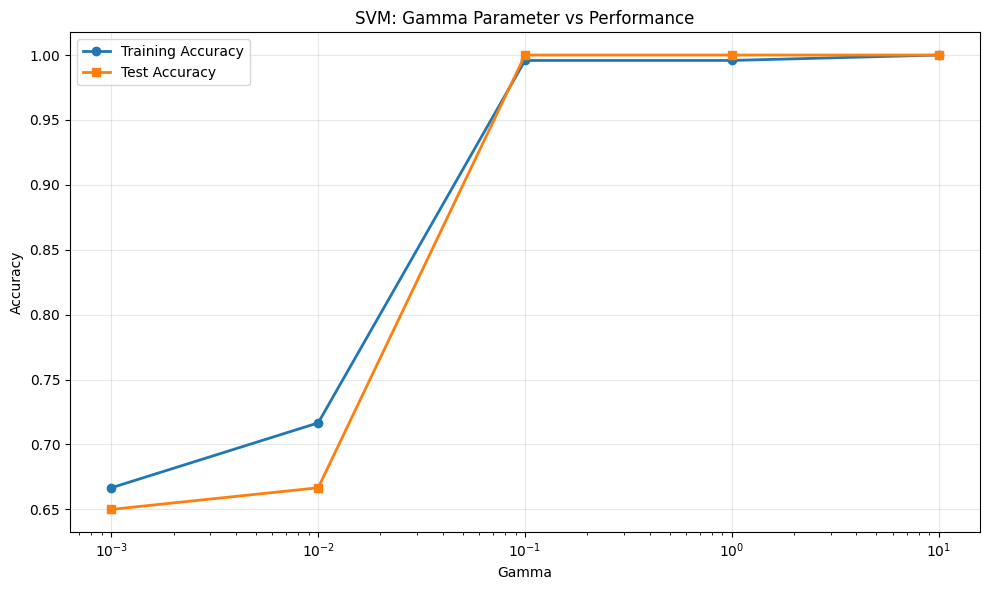

In [16]:
# Plot gamma parameter effect
plt.figure(figsize=(10, 6))
plt.semilogx(gamma_values, train_scores_gamma, 'o-', label='Training Accuracy', linewidth=2)
plt.semilogx(gamma_values, test_scores_gamma, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('SVM: Gamma Parameter vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('svm_gamma_parameter.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_gamma_parameter.png'")
plt.show()


7. Decision Boundaries Visualization
تصور حدود القرار

✓ Plot saved as 'svm_decision_boundaries.png'


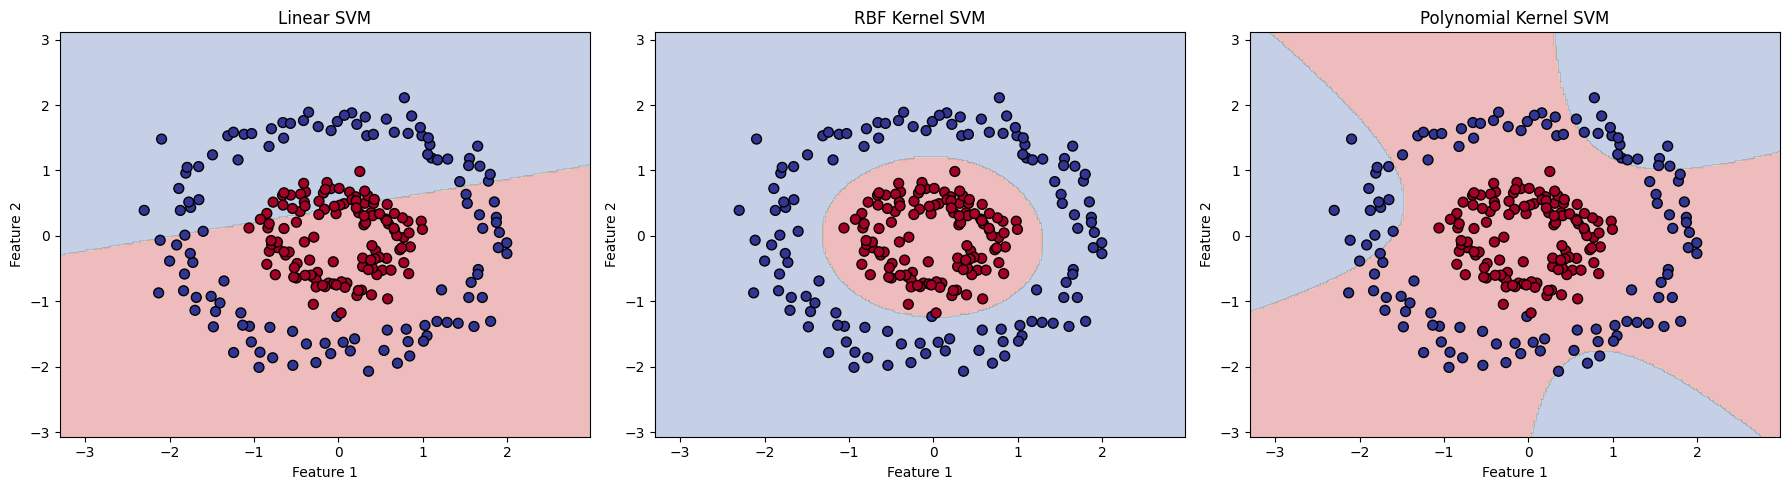

In [17]:
# 7. Decision Boundaries Visualization
print("\n" + "=" * 60)
print("7. Decision Boundaries Visualization")
print("تصور حدود القرار")
print("=" * 60)

def plot_decision_boundary(X, y, model, title, ax):
    """Plot decision boundary for 2D data"""
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
                        edgecolors='black', s=50)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_for_plot = [
    (svm_linear, 'Linear SVM', X_train_scaled),
    (svm_rbf, 'RBF Kernel SVM', X_train_scaled),
    (svm_poly, 'Polynomial Kernel SVM', X_train_scaled)
]

for idx, (model, title, X_plot) in enumerate(models_for_plot):
    plot_decision_boundary(X_plot, y_train, model, title, axes[idx])

plt.tight_layout()
plt.savefig('svm_decision_boundaries.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_decision_boundaries.png'")
plt.show()


In [18]:
# 8. Support Vectors
print("\n" + "=" * 60)
print("8. Support Vectors Analysis")
print("تحليل ناقلات الدعم")
print("=" * 60)
print(f"\nNumber of Support Vectors (Linear): {len(svm_linear.support_vectors_)}")
print(f"Number of Support Vectors (RBF): {len(svm_rbf.support_vectors_)}")
print(f"Number of Support Vectors (Polynomial): {len(svm_poly.support_vectors_)}")



8. Support Vectors Analysis
تحليل ناقلات الدعم

Number of Support Vectors (Linear): 238
Number of Support Vectors (RBF): 31
Number of Support Vectors (Polynomial): 238



✓ Plot saved as 'support_vectors.png'


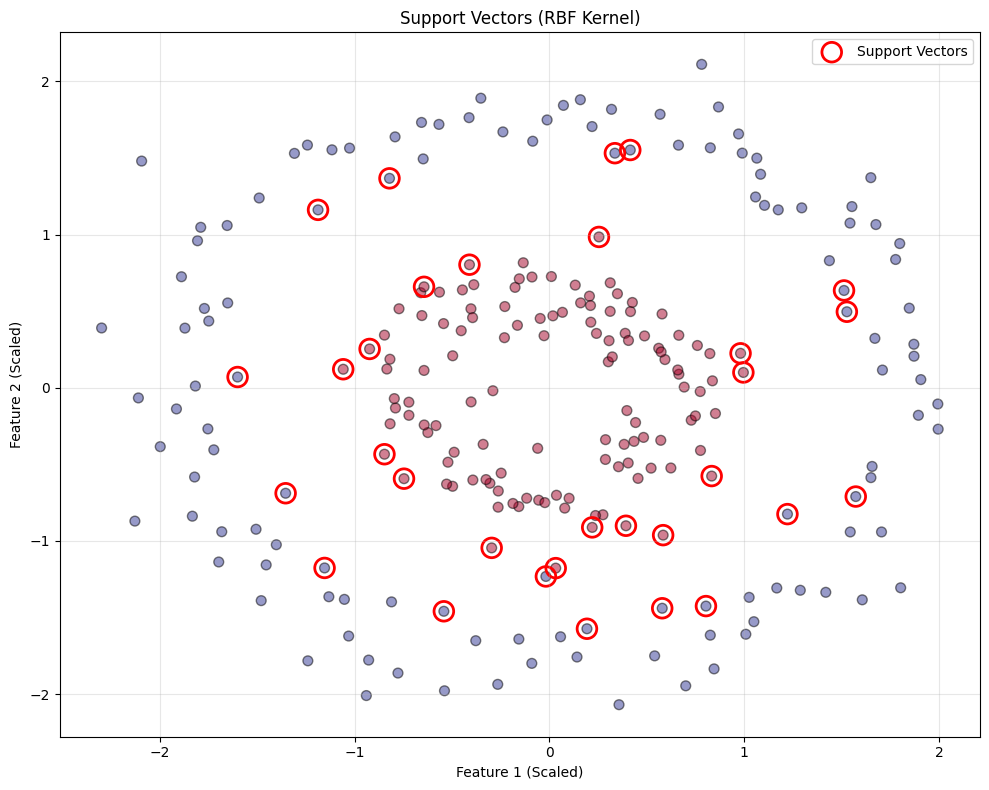

In [19]:
# Visualize support vectors
plt.figure(figsize=(10, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
           c=y_train, cmap='RdYlBu', alpha=0.5, s=50, edgecolors='black')
plt.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1],
           facecolors='none', edgecolors='red', s=200, linewidths=2,
           label='Support Vectors')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Support Vectors (RBF Kernel)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('support_vectors.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'support_vectors.png'")
plt.show()

In [20]:
# 9. ROC Curves Comparison
print("\n" + "=" * 60)
print("9. ROC Curves Comparison")
print("مقارنة منحنيات ROC")
print("=" * 60)



9. ROC Curves Comparison
مقارنة منحنيات ROC


In [ ]:
# Calculate ROC curves
y_test_proba_linear = svm_linear.predict_proba(X_test_scaled)[:, 1]
y_test_proba_poly = svm_poly.predict_proba(X_test_scaled)[:, 1]
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_test_proba_linear)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_test_proba_rbf)
fpr_poly, tpr_poly, _ = roc_curve(y_test, y_test_proba_poly)
auc_linear = roc_auc_score(y_test, y_test_proba_linear)
auc_rbf = roc_auc_score(y_test, y_test_proba_rbf)
auc_poly = roc_auc_score(y_test, y_test_proba_poly)
print(f"\nAUC Scores:")
print(f"Linear: {auc_linear:.4f}")
print(f"RBF: {auc_rbf:.4f}")
print(f"Polynomial: {auc_poly:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting AUC Scores | تفسير درجات AUC")
print("=" * 60)

auc_scores = {
    'Linear': auc_linear,
    'RBF': auc_rbf,
    'Polynomial': auc_poly
}

best_auc_kernel = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_auc_kernel]

print(f"\n📊 Best AUC: {best_auc_kernel} ({best_auc:.4f})")
print(f"   - This kernel has the best ability to distinguish classes")

print(f"\n🔍 AUC Quality Assessment:")
for kernel, score in auc_scores.items():
    if score >= 0.9:
        quality = "✅ EXCELLENT"
    elif score >= 0.8:
        quality = "✅ GOOD"
    elif score >= 0.7:
        quality = "⚠️  FAIR"
    elif score >= 0.5:
        quality = "⚠️  POOR"
    else:
        quality = "❌ VERY POOR"
    print(f"   - {kernel}: {score:.4f} ({quality})")

if auc_rbf == 1.0:
    print(f"\n⚠️  Perfect AUC Warning:")
    print(f"   - RBF has perfect AUC (1.0)")
    print(f"   - This is unusual and might indicate:")
    print(f"     • Overfitting to test data")
    print(f"     • Data leakage (test data too similar to train)")
    print(f"     • Dataset is too easy (not realistic)")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC measures model's ability to separate classes (0-1 scale)")
print(f"   - Higher AUC = better at distinguishing between classes")
print(f"   - AUC > 0.9 is excellent, >0.8 is good, >0.7 is fair")
print(f"   - Perfect AUC (1.0) is suspicious - check for overfitting")
print(f"   - Compare AUC with accuracy to get full picture")
print(f"   - RBF kernel often has best AUC for non-linear data")


AUC Scores:
Linear: 0.5600
RBF: 1.0000
Polynomial: 0.5833


## Step 8: Decision Framework - Kernel Selection for SVM | الخطوة 8: إطار القرار - اختيار النواة لـ SVM

**BEFORE**: You've learned how to use different SVM kernels, but when should you use each one?

**AFTER**: You'll have a clear decision framework to choose the right kernel for any classification problem!

**Why this matters**: Using the wrong kernel can:
- **Poor performance** → Wrong kernel can't capture the patterns
- **Overfitting** → Complex kernels may overfit on small data
- **Wasted computation** → Using expensive kernels when simple ones work

---

### 🎯 Decision Framework: Which Kernel to Use? | إطار القرار: أي نواة تستخدم؟

**Key Question**: Should I use **LINEAR**, **RBF**, **POLYNOMIAL**, or another kernel?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use SVR (Support Vector Regression) with appropriate kernel
│   └─ Why? SVM for regression uses same kernels
│
└─ CLASSIFICATION → Check data characteristics:
    ├─ Linear decision boundary? → Use LINEAR kernel ✅
    │   └─ Why? Simple, fast, interpretable
    │
    ├─ Non-linear, smooth curves? → Use RBF kernel ✅
    │   └─ Why? Handles smooth non-linear patterns well
    │
    ├─ Non-linear, polynomial patterns? → Use POLYNOMIAL kernel ⚠️
    │   └─ Why? Can capture polynomial relationships
    │
    └─ Unknown pattern? → Start with RBF kernel ✅
        └─ Why? Most versatile, good default
```

#### Detailed Decision Process:

```
Step 1: Visualize the data
├─ Plot scatter plot or decision boundary
│
└─ What pattern do you see?
    ├─ Straight line separation → LINEAR kernel
    ├─ Smooth curves → RBF kernel
    ├─ Polynomial patterns → POLYNOMIAL kernel
    └─ Unknown → Try RBF first (most versatile)

Step 2: Try Linear kernel first
├─ Build SVM with linear kernel
├─ Check performance
│
└─ Is performance good enough?
    ├─ YES (accuracy > 0.85) → Use LINEAR kernel ✅
    └─ NO (accuracy < 0.85) → Try RBF kernel

Step 3: Try RBF kernel
├─ Build SVM with RBF kernel
├─ Tune C and gamma
├─ Check performance
│
└─ Is performance good enough?
    ├─ YES → Use RBF kernel ✅
    └─ NO → Try Polynomial kernel or other methods
```

---

### 📊 Comparison Table: SVM Kernels | جدول المقارنة

| Kernel | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear** | Linear boundaries, large datasets, fast | • Fast<br>• Interpretable<br>• Less overfitting<br>• Good for large data | • Can't handle non-linear<br>• Limited to linear patterns | Linearly separable data, text classification |
| **RBF (Radial Basis Function)** | Non-linear, smooth curves, default choice | • Handles non-linear<br>• Versatile<br>• Smooth boundaries<br>• Good default | • Requires tuning (C, gamma)<br>• Slower than linear<br>• Can overfit | Most non-linear problems, default choice |
| **Polynomial** | Polynomial patterns, specific relationships | • Handles polynomial patterns<br>• Flexible degree | • More hyperparameters<br>• Can overfit<br>• Slower | Polynomial relationships, specific patterns |
| **Sigmoid** | Neural network-like, rarely used | • Similar to neural networks | • Rarely better than RBF<br>• Less common | Special cases, rarely used |

---

### ✅ When to Use Each Kernel | متى تستخدم كل نواة

#### Use Linear Kernel when:
1. **Linear Decision Boundary** ✅
   - Data is linearly separable
   - Straight line can separate classes
   - **Example**: Text classification, linearly separable data

2. **Large Dataset** ✅
   - More than 10,000 samples
   - Linear is faster
   - **Example**: Large-scale text classification

3. **Interpretability Needed** ✅
   - Need to understand decision boundary
   - Linear is more interpretable
   - **Example**: Medical diagnosis with linear patterns

4. **Fast Training Needed** ✅
   - Need quick results
   - Linear is fastest
   - **Example**: Real-time classification

#### Use RBF Kernel when:
1. **Non-Linear Patterns** ✅
   - Data has curves, non-linear boundaries
   - Linear kernel fails
   - **Example**: Most real-world classification problems

2. **Unknown Pattern** ✅
   - Don't know the pattern type
   - RBF is good default
   - **Example**: First attempt at new problem

3. **Smooth Boundaries** ✅
   - Need smooth, curved decision boundaries
   - RBF creates smooth curves
   - **Example**: Image classification, complex patterns

4. **Small to Medium Dataset** ✅
   - Less than 10,000 samples
   - RBF works well
   - **Example**: Most classification problems

#### Use Polynomial Kernel when:
1. **Polynomial Relationships** ✅
   - Data has polynomial patterns (x², x³ relationships)
   - RBF may not capture well
   - **Example**: Specific polynomial patterns

2. **Specific Domain Knowledge** ✅
   - Know the relationship is polynomial
   - **Example**: Physics-based problems

---

### ❌ When NOT to Use Each Kernel | متى لا تستخدم كل نواة

#### Don't use Linear Kernel when:
1. **Non-Linear Patterns** ❌
   - Data has curves, complex boundaries
   - **Use Instead**: RBF or Polynomial kernel

2. **Poor Performance** ❌
   - Linear accuracy < 0.80
   - **Use Instead**: RBF kernel

#### Don't use RBF Kernel when:
1. **Very Large Dataset** ❌
   - More than 100,000 samples
   - RBF is slow
   - **Use Instead**: Linear kernel or other methods

2. **Linear Patterns** ❌
   - Data is linearly separable
   - **Use Instead**: Linear kernel (simpler, faster)

#### Don't use Polynomial Kernel when:
1. **Unknown Patterns** ❌
   - Don't know if polynomial
   - **Use Instead**: RBF kernel (more versatile)

2. **Small Dataset** ❌
   - Less than 100 samples
   - Polynomial may overfit
   - **Use Instead**: RBF or Linear kernel

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Text Classification ✅ LINEAR KERNEL
- **Problem**: Classify documents (spam/not spam)
- **Pattern**: Linear (word frequencies linearly related)
- **Dataset**: Large (50,000 documents)
- **Decision**: ✅ Use Linear Kernel
- **Reasoning**: Linear patterns, large dataset, fast training needed

#### Example 2: Image Classification ✅ RBF KERNEL
- **Problem**: Classify images (cat/dog)
- **Pattern**: Non-linear (complex pixel patterns)
- **Dataset**: Medium (5,000 images)
- **Decision**: ✅ Use RBF Kernel
- **Reasoning**: Non-linear patterns, smooth boundaries needed, medium dataset

#### Example 3: Customer Segmentation ✅ RBF KERNEL
- **Problem**: Segment customers (high/medium/low value)
- **Pattern**: Unknown, likely non-linear
- **Dataset**: Medium (2,000 customers)
- **Decision**: ✅ Use RBF Kernel (start here)
- **Reasoning**: Unknown pattern, RBF is good default, can tune C and gamma

#### Example 4: Medical Diagnosis (Linear) ✅ LINEAR KERNEL
- **Problem**: Diagnose disease from symptoms
- **Pattern**: Linear (symptoms linearly related to disease)
- **Dataset**: Small (500 patients)
- **Decision**: ✅ Use Linear Kernel
- **Reasoning**: Linear patterns, interpretability important, small dataset

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Start with Linear** - Always try linear kernel first (simplest)
2. **Non-linear → RBF** - Use RBF for non-linear patterns (most versatile)
3. **RBF is default** - Good default choice when pattern is unknown
4. **Tune C and gamma** - Critical hyperparameters for RBF
5. **Large data → Linear** - Linear is faster for large datasets
6. **Visualize boundaries** - Plot decision boundaries to see pattern
7. **Compare kernels** - Try multiple kernels, pick the best

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Classifying emails as spam (50,000 emails)
- **Pattern**: Linear (word frequencies)
- **Dataset**: Large (50,000)
- **Decision**: ✅ Linear Kernel (linear patterns, large dataset, fast)

**Scenario 2**: Classifying images (cat/dog, 3,000 images)
- **Pattern**: Non-linear (complex pixel patterns)
- **Dataset**: Medium (3,000)
- **Decision**: ✅ RBF Kernel (non-linear patterns, smooth boundaries)

**Scenario 3**: Customer churn prediction (unknown pattern, 1,000 customers)
- **Pattern**: Unknown
- **Dataset**: Medium (1,000)
- **Decision**: ✅ RBF Kernel (unknown pattern, good default, can tune)

---

**Connection to Next Steps**: 
- 📓 **Unit 5, Example 1: Grid Search** - For tuning C and gamma hyperparameters
- 📓 **Unit 3, Example 2: Decision Trees** - Alternative for non-linear patterns
- 📓 **Unit 5, Example 2: Boosting** - For best performance on complex problems



✓ Plot saved as 'svm_roc_curves.png'


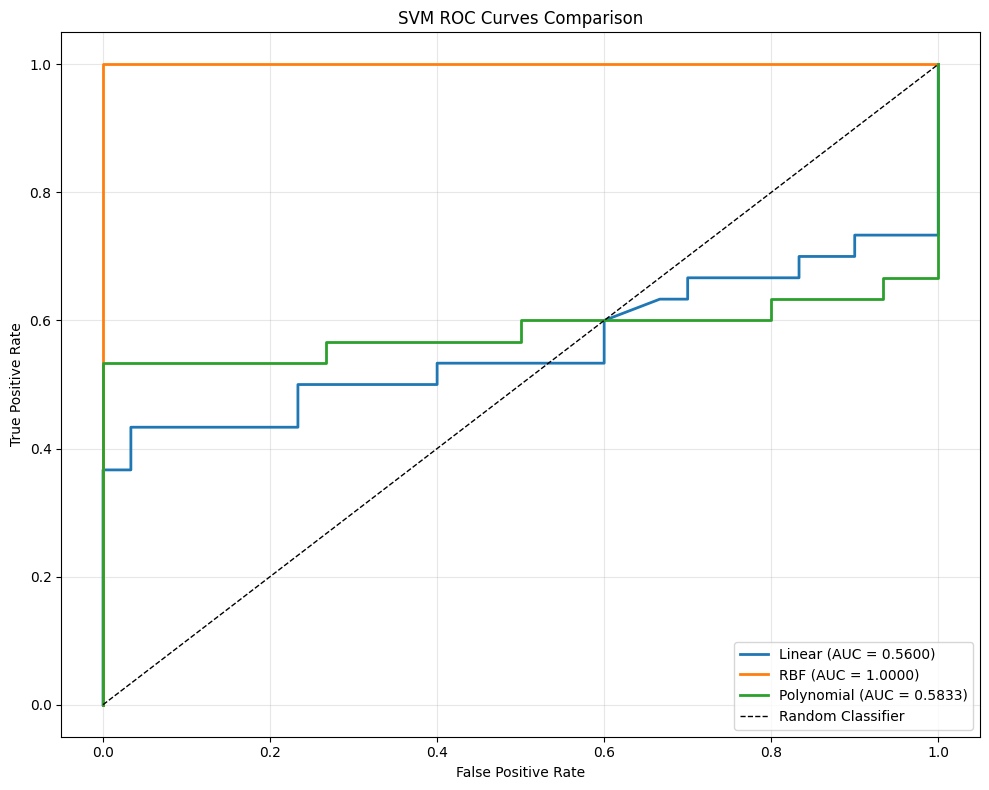


Example 3 Complete! ✓
اكتمل المثال 3! ✓


In [22]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_linear, tpr_linear, linewidth=2, label=f'Linear (AUC = {auc_linear:.4f})')
plt.plot(fpr_rbf, tpr_rbf, linewidth=2, label=f'RBF (AUC = {auc_rbf:.4f})')
plt.plot(fpr_poly, tpr_poly, linewidth=2, label=f'Polynomial (AUC = {auc_poly:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('svm_roc_curves.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_roc_curves.png'")
plt.show()
print("\n" + "=" * 60)
print("Example 3 Complete! ✓")
print("اكتمل المثال 3! ✓")
print("=" * 60)
